# 01 - Santiago aoi

This notebook uploads from local to database Santiago's (Chile) area of interest.

__Two polygons were uploaded:__
* The first under the city name __'Santiago'__ had its borders manually drawn according to general urban shape, is smaller.
* The second, under the city name __'AM_Santiago'__ has borders composed from mixed political boundaries around Santiago and some manual drawing. It's objective is to include parts of the non-contigual urban shape that may have similar dynamics to the contigual urban shape.

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [8]:
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

# save output to database?
save = False
if_exists='replace'

##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

## Load data and add city column

In [3]:
aoi_dir = "../../../data/external/temporal_todocker/santiago/proximidad/santiago_odc_aoi_32719.gpkg"
aoi_gdf = gpd.read_file(aoi_dir)
aoi_gdf = aoi_gdf.to_crs("EPSG:4326")

# Show
print(aoi_gdf.shape)
aoi_gdf.head(2)

(1, 11)


,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,COD_DISTRI,TIPO_DISTR,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,BUIN,6,MIXTO,0.299481,0.003201,"MULTIPOLYGON (((-70.69165 -33.80508, -70.69167..."


<Axes: >

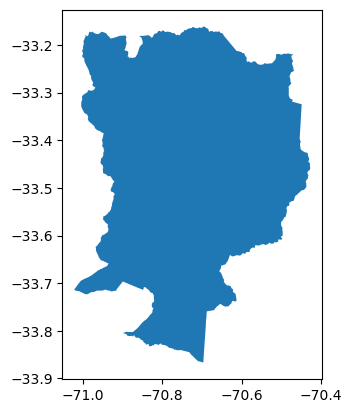

In [4]:
aoi_gdf.plot()

In [5]:
aoi_gdf['city'] = 'AM_Santiago'
aoi_gdf = aoi_gdf[['city','geometry']]

# Show
print(aoi_gdf.shape)
aoi_gdf.head(2)

(1, 2)


,city,geometry
0,AM_Santiago,"MULTIPOLYGON (((-70.69165 -33.80508, -70.69167..."


## Save to database

In [7]:
save_schema = 'projects_research'
save_table = 'santiago_aoi'

if save:
    aup.gdf_to_db_slow(aoi_gdf, save_table, save_schema, if_exists=if_exists)